In [212]:
import matplotlib.pyplot as plt
import csv
from PIL import Image
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import argparse
import pickle

This notebook of code is just for report. 
1) Trying different parameters to get the best model.
2) Try different way of image preprocessing. 

Actual trainer program & testing program is at another notebook.

In [213]:
FOLDER_DIR = "/Users/kaiyuan/Desktop/3023Project/TrafficSignData/Training"

In [214]:
import os
print("Folder should look like:")
print(os.listdir(FOLDER_DIR))
print()


Folder should look like:
['00009', '00000', '00007', '00006', '00001', '00008', '00012', '00014', '00013', '00004', '00003', '00002', '00005', '00011', '00010']



Read files with preprocessing of 
1) Resize

In [215]:
import cv2 as cv
from skimage import exposure

def readTrafficSigns(rootpath):
    '''Reads traffic sign data 
    Arguments: path to the traffic sign data, for example './TrafficSignData/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over N classes, at most we have 42 classes
    N=15
    for c in range(0,N):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        #gtReader.next() # skip header
        next(gtReader)
        # loop over all images in current annotations file
        for row in gtReader:
            img=Image.open(prefix + row[0])  # the 1th column is the filename
            # preprocesing image, make sure the images are in the same size
            img=img.resize((32,32), Image.BICUBIC)
            
            img=np.array(img)
            images.append(img) 
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

In [216]:
trainImage, trainLabels = readTrafficSigns(FOLDER_DIR)

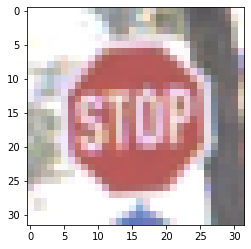

In [217]:
plt.imshow(trainImage[15000])

In [218]:
print(f"the shape of trainImage is {np.shape(trainImage)}")
print("below is the image after such preprocessing")

the shape of trainImage is (15540, 32, 32, 3)
below is the image after such preprocessing


In [219]:
trainImage[50]

array([[[172, 101, 106],
        [158,  54,  59],
        [158,  40,  35],
        ...,
        [159,  47,  33],
        [154,  54,  38],
        [150,  78,  75]],

       [[160,  80,  79],
        [153,  44,  39],
        [160,  41,  35],
        ...,
        [157,  80,  66],
        [152,  89,  77],
        [134,  82,  75]],

       [[131,  54,  47],
        [145,  44,  33],
        [152,  43,  36],
        ...,
        [162, 122, 115],
        [150, 120, 116],
        [132, 107, 103]],

       ...,

       [[ 91, 131, 151],
        [ 99,  76,  87],
        [149, 115, 118],
        ...,
        [222, 229, 224],
        [183, 181, 126],
        [206, 166, 136]],

       [[148, 181, 200],
        [104, 114, 137],
        [134, 130, 122],
        ...,
        [206, 234, 230],
        [133, 162, 119],
        [143, 120,  85]],

       [[255, 255, 255],
        [234, 235, 242],
        [238, 237, 230],
        ...,
        [190, 233, 232],
        [ 59, 112, 104],
        [ 94,  92,  84]]

Read files with preprocessing of 
1) Resize
2) Equalizer using CLAHE for contrast correction

In [220]:
import cv2 as cv
from skimage import exposure

def readTrafficSigns(rootpath):
    '''Reads traffic sign data 
    Arguments: path to the traffic sign data, for example './TrafficSignData/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over N classes, at most we have 42 classes
    N=15
    for c in range(0,N):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        #gtReader.next() # skip header
        next(gtReader)
        # loop over all images in current annotations file
        for row in gtReader:
            img=Image.open(prefix + row[0])  # the 1th column is the filename
            # preprocesing image, make sure the images are in the same size
            img=img.resize((32,32), Image.BICUBIC)
            
            img=np.array(img)
            img=exposure.equalize_adapthist(img,clip_limit=0.1)
            images.append(img) 
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels



In [221]:
trainImage, trainLabels = readTrafficSigns(FOLDER_DIR)

In [222]:
print("below is the image after such preprocessing")

below is the image after such preprocessing


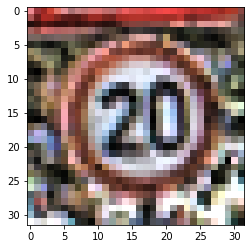

In [223]:
plt.imshow(trainImage[50])

In [224]:
trainImage[50]

array([[[0.93415638, 0.54854532, 0.57570102],
        [0.60493827, 0.20675105, 0.22589467],
        [0.60493827, 0.15314893, 0.13400531],
        ...,
        [0.7037037 , 0.20801304, 0.14605171],
        [0.67078189, 0.23520924, 0.16551761],
        [0.53909465, 0.28032922, 0.26954733]],

       [[0.67078189, 0.33539095, 0.33119856],
        [0.40740741, 0.11716291, 0.10384895],
        [0.67078189, 0.17188786, 0.14673354],
        ...,
        [0.65432099, 0.33341197, 0.27506487],
        [0.60493827, 0.35420728, 0.30644899],
        [0.40740741, 0.24930901, 0.22802653]],

       [[0.14403292, 0.05937235, 0.05167593],
        [0.20987654, 0.06368668, 0.04776501],
        [0.34156379, 0.0966266 , 0.08089669],
        ...,
        [0.81893004, 0.61672509, 0.58133923],
        [0.53909465, 0.43127572, 0.41689986],
        [0.34156379, 0.27687368, 0.26652326]],

       ...,

       [[0.40424604, 0.58193661, 0.67078189],
        [0.30864198, 0.23693727, 0.27123083],
        [0.60493827, 0

Read files with preprocessing of 
1) Resize
2) Equalizer using CLAHE for contrast correction
3) convert into gray image

In [225]:
import cv2 as cv
from skimage import exposure

def readTrafficSigns(rootpath):
    '''Reads traffic sign data 
    Arguments: path to the traffic sign data, for example './TrafficSignData/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over N classes, at most we have 42 classes
    N=15
    for c in range(0,N):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        #gtReader.next() # skip header
        next(gtReader)
        # loop over all images in current annotations file
        for row in gtReader:
            img=Image.open(prefix + row[0])  # the 1th column is the filename
            # preprocesing image, make sure the images are in the same size
            img=img.resize((32,32), Image.BICUBIC)
            
            img=np.array(img)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img=exposure.equalize_adapthist(img,clip_limit=0.1)
            images.append(img) 
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels


In [226]:
trainImage, trainLabels = readTrafficSigns(FOLDER_DIR)

In [227]:
print("below is the image after such preprocessing")

below is the image after such preprocessing


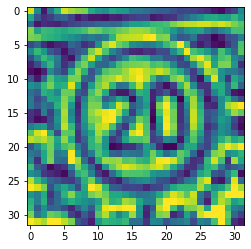

In [228]:
plt.imshow(trainImage[50])

In [229]:
trainImage[50]

array([[0.93333333, 0.46666667, 0.06666667, ..., 0.13333333, 0.2       ,
        0.46666667],
       [0.6       , 0.26666667, 0.13333333, ..., 0.55      , 0.66666667,
        0.53333333],
       [0.33333333, 0.06666667, 0.13333333, ..., 0.88333333, 0.8       ,
        0.73333333],
       ...,
       [0.66666667, 0.28333333, 0.5       , ..., 0.67083333, 0.43333333,
        0.36666667],
       [0.8       , 0.4       , 0.53333333, ..., 0.75      , 0.33333333,
        0.2       ],
       [1.        , 0.93333333, 0.86666667, ..., 0.7       , 0.13333333,
        0.06666667]])

In [230]:
print(f"Total data is {len(trainImage)}")

Total data is 15540


In [231]:
print(f"the shape of trainImage is {np.shape(trainImage)}")

the shape of trainImage is (15540, 32, 32)


Split data into training & validation

In [232]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.10

def loadData():
    trainImages, trainLabels = readTrafficSigns(FOLDER_DIR)
    print('number of historical data=', len(trainLabels))
    # design the input and output for model
    X=[]
    Y=[]
    for i in range(0,len(trainLabels)):
        # input X just the flattern image
        X.append(trainImages[i].flatten())
        Y.append(int(trainLabels[i]))
    X=np.array(X)
    Y=np.array(Y)
    print(f"shape of X : {np.shape(X)}")
    X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=TEST_SIZE)
    print(f"shape of X_train : {np.shape(X_train)}")
    print(f"length of training data : {len(X_train)}.")
    print(f"length of testing data : {len(X_val)}.")
    return X_train, X_val, y_train, y_val

In [233]:
X_train, X_val, y_train, y_val = loadData()

number of historical data= 15540
shape of X : (15540, 1024)
shape of X_train : (13986, 1024)
length of training data : 13986.
length of testing data : 1554.


Define Classifier, here we are using :
1) Random Forest
2) SVM
3) Neural Network

(1) Random Forest

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import time

randomForest = RandomForestClassifier(n_estimators=10, random_state=0)
start_time = time.time()
randomForest = randomForest.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time
model_confusion_matrix = confusion_matrix(y_val,randomForest.predict(X_val))

print("RandomForestClassifier, training accuracy: %.3f, validation accuracy: %.3f" % (
    randomForest.score(X_train, y_train), randomForest.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.2f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)

RandomForestClassifier, training accuracy: 0.999, validation accuracy: 0.903
Fitting Duration (seconds) :2.28s
Confusion Matrix :
[[ 10   0   0   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0 143   3   1   5   2   0   0   0   0   0   0   0   1   1]
 [  0  10 135   2   1   6   0   0   1   0   0   1   0   0   0]
 [  0   1   9  66   0  10   0   0   0   0   0   0   1   0   0]
 [  0   6   3   0 120   2   0   1   0   0   0   0   0   0   0]
 [  0   5   6   5   2  92   0   1   1   1   1   0   0   0   0]
 [  0   1   1   0   0   0  30   0   0   0   0   0   0   0   0]
 [  0   4   3   0   3   2   0  76   2   1   0   0   1   0   0]
 [  0   3   1   0   2   4   0   4  84   0   0   0   0   0   0]
 [  0   0   1   0   1   3   0   0   0  86   0   0   0   0   0]
 [  0   0   0   0   1   3   0   1   0   0 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0  93   0   0   0]
 [  0   2   0   0   1   0   0   0   0   2   2   0 137   0   0]
 [  0   0   0   1   0   1   0   1   1   0   1   0  

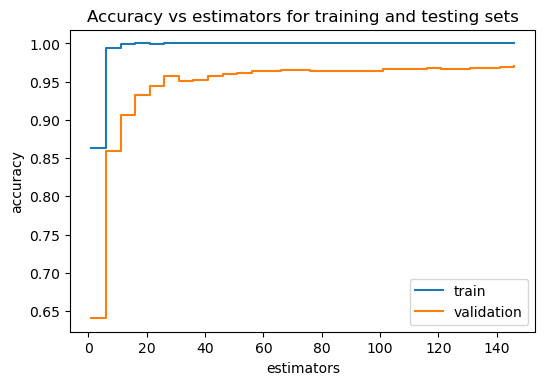

In [235]:
import matplotlib.pyplot as plt

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 150
train_scores = []
val_scores = []

randomForest = RandomForestClassifier(n_estimators=1, random_state=0)
for i in range(min_estimators, max_estimators + 1, 5):
        randomForest.set_params(n_estimators=i)
        randomForest.fit(X_train, y_train)
        train_scores.append(randomForest.score(X_train, y_train))
        val_scores.append(randomForest.score(X_val, y_val))

fig, ax = plt.subplots(dpi = 100)
ax.set_xlabel("estimators")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs estimators for training and testing sets")
ax.plot(range(min_estimators, max_estimators + 1, 5), train_scores, label="train",
        drawstyle="steps-post")
ax.plot(range(min_estimators, max_estimators + 1, 5), val_scores, label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


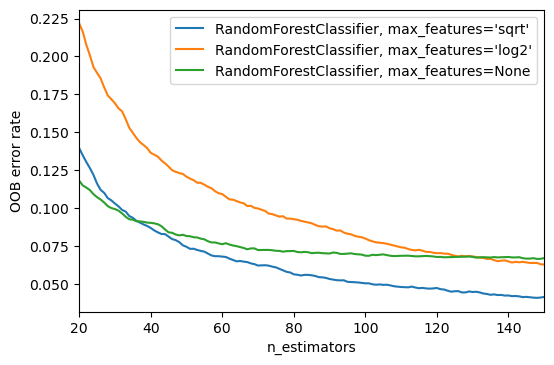

In [236]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

plt.figure(dpi=100)
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [237]:
# with BEST performance parameter

randomForest = RandomForestClassifier(n_estimators=40, random_state=0,max_features = "sqrt")
start_time = time.time()
randomForest = randomForest.fit(X_train, y_train)
end_time = time.time()

duration = end_time - start_time

model_confusion_matrix = confusion_matrix(y_val,randomForest.predict(X_val))
 
print("RandomForestClassifier, training accuracy: %.3f, validation accuracy: %.3f" % (
    randomForest.score(X_train, y_train), randomForest.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.2f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)

cv_scores = cross_val_score(randomForest, X_train, y_train, cv=5)
print("Cross-Validation-Scores: "+str(cv_scores))
print("MAX Cross-Validation-Score: "+str(max(cv_scores)))
print("MIN Cross-Validation-Score: "+str(min(cv_scores)))
print("Cross-Validation-Accuracy: %.6f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

RandomForestClassifier, training accuracy: 1.000, validation accuracy: 0.958
Fitting Duration (seconds) :7.36s
Confusion Matrix :
[[ 12   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 148   4   1   3   0   0   0   0   0   0   0   0   0   0]
 [  0   4 144   2   1   3   0   0   0   1   0   1   0   0   0]
 [  0   0   6  74   0   3   0   0   3   0   0   0   1   0   0]
 [  0   2   1   0 129   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1   3   0 108   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1   1   0  86   1   1   0   0   1   0   0]
 [  0   0   0   0   0   1   0   2  95   0   0   0   0   0   0]
 [  0   0   1   0   0   1   0   0   0  89   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0 130   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   2   0   0   0   0   0   0   1   0   0 141   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0  

(2) SVM

In [238]:
from sklearn import svm
clf = svm.SVC(kernel="linear")
start_time = time.time()

clf.fit(X_train,y_train)
end_time = time.time()

duration = end_time - start_time
score = clf.score(X_val,y_val)
model_confusion_matrix = confusion_matrix(y_val,clf.predict(X_val))


print("SVM, training accuracy: %.3f, validation accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.4f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)



SVM, training accuracy: 1.000, validation accuracy: 0.955
Fitting Duration (seconds) :18.8325s
Confusion Matrix :
[[ 14   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 149   5   0   1   0   0   0   1   0   0   0   0   0   0]
 [  0  13 130   3   1   7   0   1   0   0   0   0   1   0   0]
 [  0   0   2  77   0   6   0   0   0   1   0   0   1   0   0]
 [  0   1   1   0 129   0   0   1   0   0   0   0   0   0   0]
 [  0   1   4   1   0 106   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0]
 [  0   0   3   0   0   1   0  88   0   0   0   0   0   0   0]
 [  0   0   1   0   0   3   0   1  93   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0  88   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0 132   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   0   0   0   1   0   0   0   1   0   0 142   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   1   0 147   0]
 [  

In [239]:
from sklearn import svm
clf = svm.SVC(kernel="poly")
start_time = time.time()

clf.fit(X_train,y_train)
end_time = time.time()

duration = end_time - start_time
score = clf.score(X_val,y_val)
model_confusion_matrix = confusion_matrix(y_val,clf.predict(X_val))

print("SVM, training accuracy: %.3f, validation accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.4f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)


SVM, training accuracy: 1.000, validation accuracy: 0.967
Fitting Duration (seconds) :21.3598s
Confusion Matrix :
[[ 14   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 147   6   0   1   0   0   1   0   0   0   0   0   0   0]
 [  0   7 144   1   0   2   0   1   0   0   0   0   1   0   0]
 [  0   0   1  82   0   2   0   0   0   0   1   0   1   0   0]
 [  0   2   1   0 128   0   0   1   0   0   0   0   0   0   0]
 [  0   2   3   1   0 107   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0]
 [  0   2   1   1   0   0   0  88   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0   1  94   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89   1   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0 132   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   0   0   0   1   0   0   0   2   0   0 141   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0 148   0]
 [  

In [240]:
from sklearn import svm
clf = svm.SVC(kernel="rbf")
start_time = time.time()

clf.fit(X_train,y_train)
end_time = time.time()

duration = end_time - start_time
score = clf.score(X_val,y_val)
model_confusion_matrix = confusion_matrix(y_val,clf.predict(X_val))

print("SVM, training accuracy: %.3f, validation accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.4f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)



SVM, training accuracy: 0.996, validation accuracy: 0.976
Fitting Duration (seconds) :51.1473s
Confusion Matrix :
[[ 14   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 150   5   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   1 152   0   0   3   0   0   0   0   0   0   0   0   0]
 [  0   1   2  78   0   3   0   0   1   0   1   0   1   0   0]
 [  0   0   2   0 130   0   0   0   0   0   0   0   0   0   0]
 [  0   2   3   0   0 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1   0   0  90   0   0   0   0   0   0   0]
 [  0   0   1   1   1   3   0   0  92   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0  90   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 132   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   1   0   0   1   0   0   0   0   0   0 142   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0 148   0]
 [  

In [241]:
# with BEST performance parameter
from sklearn import svm
clf = svm.SVC(kernel="rbf", C=10.5)
start_time = time.time()

clf.fit(X_train,y_train)
end_time = time.time()

duration = end_time - start_time
score = clf.score(X_val,y_val)
model_confusion_matrix = confusion_matrix(y_val,clf.predict(X_val))

print("SVM, training accuracy: %.3f, validation accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.4f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)


cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation-Scores: "+str(cv_scores))
print("MAX Cross-Validation-Score: "+str(max(cv_scores)))
print("MIN Cross-Validation-Score: "+str(min(cv_scores)))
print("Cross-Validation-Accuracy: %.6f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))


SVM, training accuracy: 1.000, validation accuracy: 0.990
Fitting Duration (seconds) :49.3108s
Confusion Matrix :
[[ 14   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 153   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1 155   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1  85   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0 132   0   0   0   0   0   0   0   0   0   0]
 [  0   1   2   0   0 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0  91   0   0   0   0   0   0   0]
 [  0   0   0   0   1   2   0   0  95   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0  90   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 132   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0 143   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0 148   0]
 [  

(3) Neural Network (MLP Classifiers)

In [242]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(50,), random_state=0)

start_time = time.time()

clf.fit(X_train,y_train)
end_time = time.time()

duration = end_time - start_time
score = clf.score(X_val,y_val)
model_confusion_matrix = confusion_matrix(y_val,clf.predict(X_val))

print("MLP, training accuracy: %.3f, validation accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.4f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)


MLP, training accuracy: 1.000, validation accuracy: 0.934
Fitting Duration (seconds) :29.7162s
Confusion Matrix :
[[ 13   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  1 141  10   0   1   1   0   0   2   0   0   0   0   0   0]
 [  0   8 132   3   0   8   0   2   0   0   1   0   2   0   0]
 [  0   1   1  79   0   4   0   0   0   0   0   0   2   0   0]
 [  0   4   1   0 124   2   0   0   1   0   0   0   0   0   0]
 [  0   1   0   3   1 107   0   0   0   0   1   0   0   1   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   1   0  86   1   1   1   0   0   0   0]
 [  0   0   2   0   2   1   0   1  90   0   1   0   1   0   0]
 [  0   0   1   0   0   2   0   1   0  85   1   0   1   0   0]
 [  0   0   0   0   0   2   0   1   1   0 127   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   1   1   0   1   0   1   1   2   0   1 136   0   0]
 [  0   0   0   1   0   0   0   0   2   0   1   2   0 143   0]
 [  

/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [243]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(50,), random_state=0)

start_time = time.time()

clf.fit(X_train,y_train)
end_time = time.time()

duration = end_time - start_time
score = clf.score(X_val,y_val)
model_confusion_matrix = confusion_matrix(y_val,clf.predict(X_val))

print("MLP, training accuracy: %.3f, validation accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.4f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)



MLP, training accuracy: 0.991, validation accuracy: 0.941
Fitting Duration (seconds) :11.5913s
Confusion Matrix :
[[ 13   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 142  11   0   2   1   0   0   0   0   0   0   0   0   0]
 [  0   4 133   1   3   6   0   5   0   1   0   1   2   0   0]
 [  0   1   3  75   1   5   0   0   0   0   1   0   1   0   0]
 [  0   2   1   0 126   3   0   0   0   0   0   0   0   0   0]
 [  0   0   1   1   1 109   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0  32   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   2   0  87   1   1   0   0   0   0   0]
 [  0   0   0   1   1   0   0   3  90   1   1   0   1   0   0]
 [  0   0   1   0   0   1   0   0   0  88   0   0   1   0   0]
 [  0   0   0   0   0   2   0   1   0   0 128   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   1   0   0   1   1   1   0   1   0   1 138   0   0]
 [  0   0   0   0   0   1   0   0   1   0   1   1   0 145   0]
 [  

/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [244]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(50,), random_state=0)

start_time = time.time()

clf.fit(X_train,y_train)
end_time = time.time()

duration = end_time - start_time
score = clf.score(X_val,y_val)
model_confusion_matrix = confusion_matrix(y_val,clf.predict(X_val))

print("MLP, training accuracy: %.3f, validation accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.4f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)



MLP, training accuracy: 0.966, validation accuracy: 0.938
Fitting Duration (seconds) :28.2430s
Confusion Matrix :
[[ 11   2   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0 140  10   1   2   2   0   0   1   0   0   0   0   0   0]
 [  0   9 134   3   1   5   0   2   0   0   0   0   2   0   0]
 [  0   0   3  77   0   4   0   1   0   0   1   0   1   0   0]
 [  0   1   2   0 128   0   0   0   1   0   0   0   0   0   0]
 [  0   0   1   0   1 111   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   1  31   0   0   0   0   0   0   0   0]
 [  0   1   0   0   1   1   0  87   0   2   0   0   0   0   0]
 [  0   0   3   2   2   2   0   2  87   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0  90   0   0   0   0   0]
 [  0   0   0   0   0   6   0   0   1   0 124   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   1   1   0   1   0   0   0   1   0   1 138   1   0]
 [  0   0   0   1   0   0   0   1   0   0   1   2   0 144   0]
 [  

/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaiyuan/o

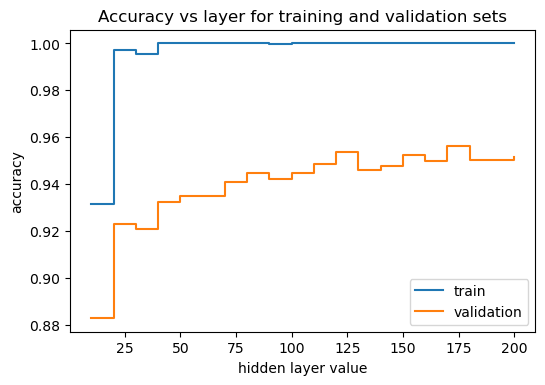

In [245]:
import matplotlib.pyplot as plt

# Range of `n_estimators` values to explore.
min_layer = 10
max_layer = 200
train_scores = []
val_scores = []

clf = MLPClassifier(hidden_layer_sizes=(50,))
for i in range(min_layer, max_layer + 1, 10):
        clf.set_params(hidden_layer_sizes=(i,))
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        val_scores.append(clf.score(X_val, y_val))

fig, ax = plt.subplots(dpi = 100)
ax.set_xlabel("hidden layer value")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs layer for training and validation sets")
ax.plot(range(min_layer, max_layer + 1, 10), train_scores, label="train",
        drawstyle="steps-post")
ax.plot(range(min_layer, max_layer + 1, 10), val_scores, label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [246]:
#best paramter
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(100,), random_state=0)

start_time = time.time()

clf.fit(X_train,y_train)
end_time = time.time()

duration = end_time - start_time
score = clf.score(X_val,y_val)
model_confusion_matrix = confusion_matrix(y_val,clf.predict(X_val))

print("MLP, training accuracy: %.3f, validation accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_val, y_val)))
print(f"Fitting Duration (seconds) :{duration:.4f}s")
print(f"Confusion Matrix :")
print(model_confusion_matrix)


cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation-Scores: "+str(cv_scores))
print("MAX Cross-Validation-Score: "+str(max(cv_scores)))
print("MIN Cross-Validation-Score: "+str(min(cv_scores)))
print("Cross-Validation-Accuracy: %.6f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))



/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP, training accuracy: 0.969, validation accuracy: 0.933
Fitting Duration (seconds) :69.7832s
Confusion Matrix :
[[ 12   1   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0 142  10   0   2   1   0   0   1   0   0   0   0   0   0]
 [  0   7 135   3   1   7   0   1   0   0   0   0   2   0   0]
 [  0   0   3  75   0   6   0   1   0   0   1   0   1   0   0]
 [  0   3   3   0 124   1   0   0   1   0   0   0   0   0   0]
 [  0   0   1   0   1 109   0   0   0   0   2   0   0   1   0]
 [  0   0   0   0   0   1  31   0   0   0   0   0   0   0   0]
 [  0   1   0   0   1   2   0  85   1   2   0   0   0   0   0]
 [  0   0   3   3   1   1   0   4  86   0   0   0   0   0   0]
 [  0   0   1   0   0   1   0   0   0  88   1   0   0   0   0]
 [  0   0   0   0   0   5   0   0   1   0 125   0   1   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0  93   0   0   0]
 [  0   0   1   0   0   1   0   0   0   2   0   1 138   1   0]
 [  0   0   0   1   0   0   0   0   0   0   1   2   0 145   0]
 [  

/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation-Scores: [0.93924232 0.92634966 0.93564533 0.92634966 0.92742224]
MAX Cross-Validation-Score: 0.9392423159399571
MIN Cross-Validation-Score: 0.9263496603503754
Cross-Validation-Accuracy: 0.931002 (+/- 0.01)


/Users/kaiyuan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
